                  Time  Total Energy Use [kW]  Energy Generation [kW]  \
0  2023-01-01 00:00:00             206.034648                1.834045   
1  2023-01-01 01:00:00             196.797214                4.667629   
2  2023-01-01 02:00:00             201.418186                6.832635   
3  2023-01-01 03:00:00             190.167818                8.422848   
4  2023-01-01 04:00:00             199.749749                5.396921   

   HVAC [kW]  Lighting [kW]  Medical Equipment [kW]  Refrigeration [kW]  \
0  88.108678      30.558083               60.105153            8.838244   
1  93.851848      30.444158               42.320235           10.284929   
2  95.863856      29.719563               49.668066            8.501847   
3  87.177823      27.244121               46.468833            9.077069   
4  85.441856      31.128928               50.255007           10.946386   

   Water Heating [kW]  Outdoor Temp [°C]  Humidity [%] Day Type  Season  \
0           18.424491          11.2

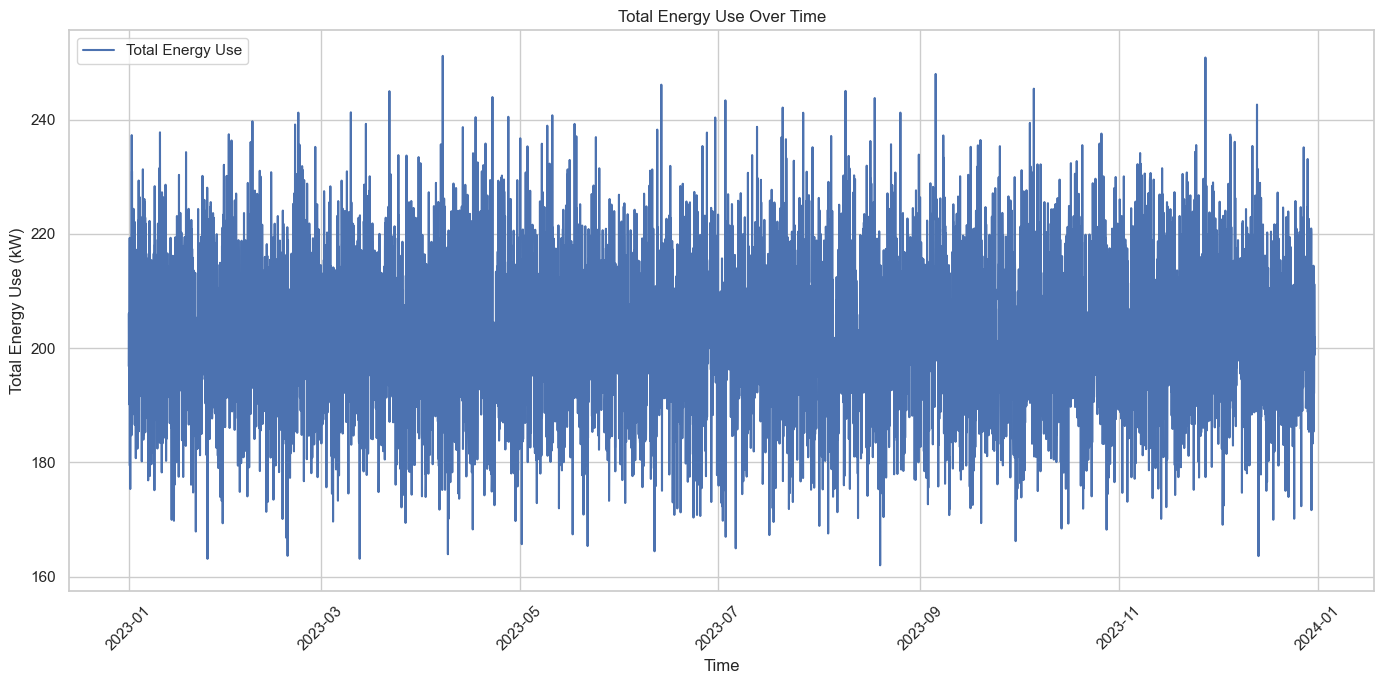

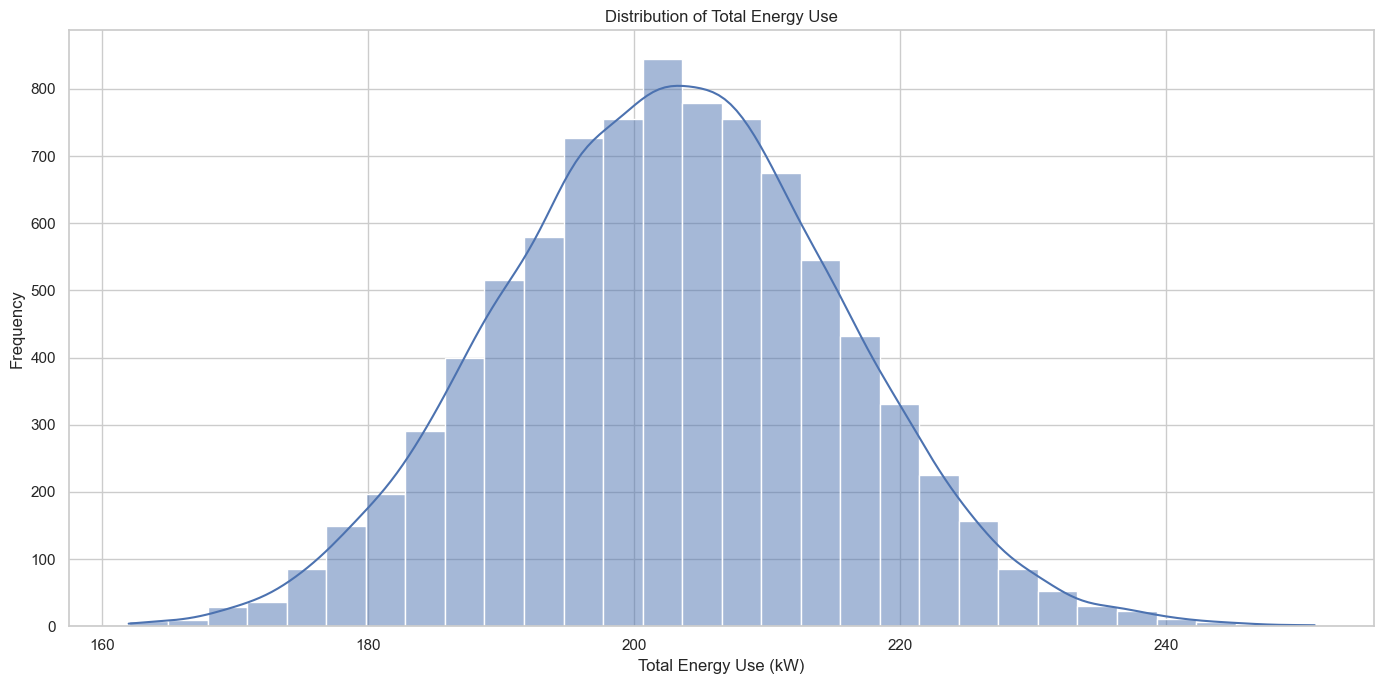

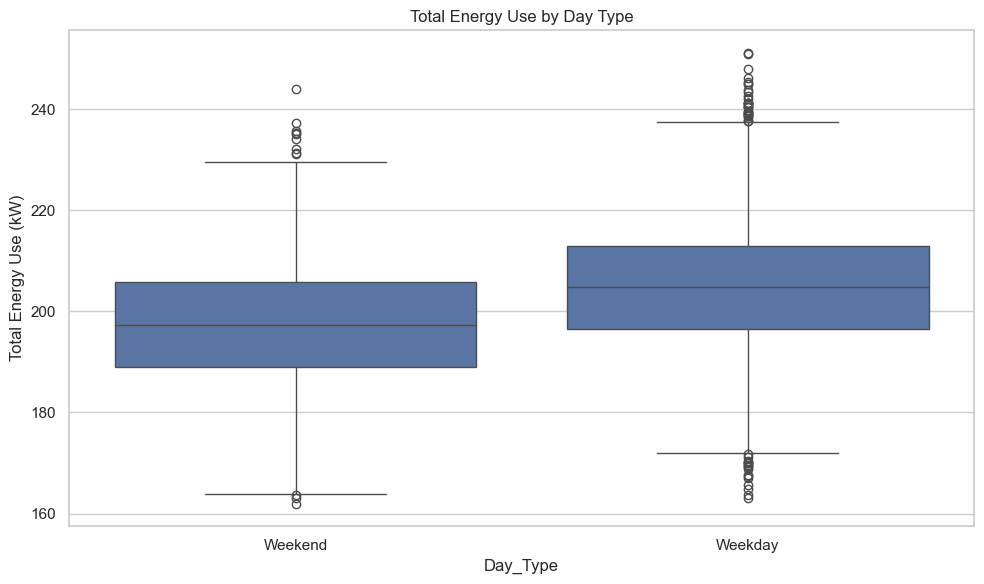

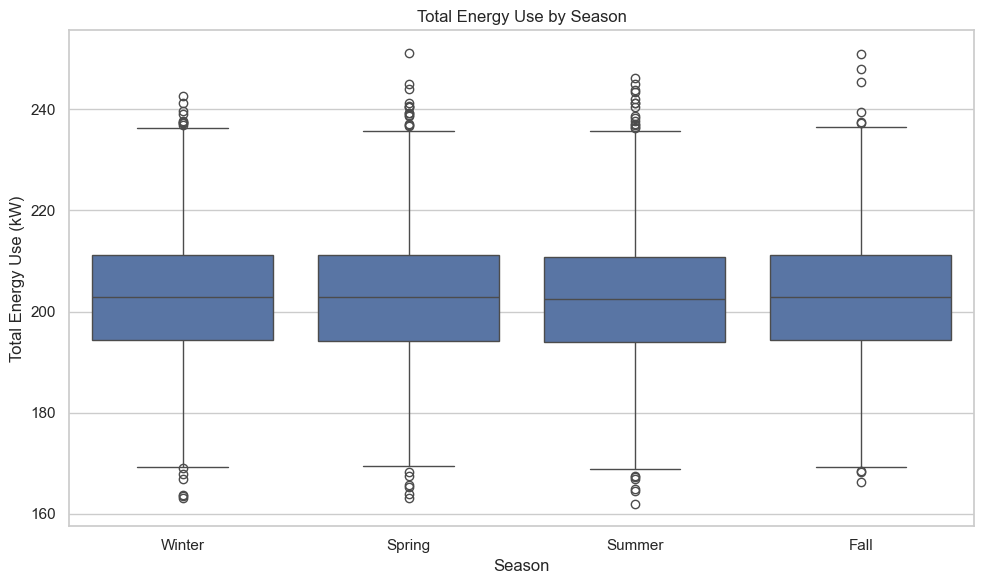

ValueError: could not convert string to float: 'Weekend'

<Figure size 1200x1000 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('finalized_hospital_energy_consumption.csv', parse_dates=['Time'], dayfirst=True)

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Rename columns for easier access
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Convert the 'Time' column to datetime format (adjust the format according to your data)
data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S')

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as needed
# data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Descriptive Statistics
print(data.describe())

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot Total Energy Use over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Time', y='Total_Energy_Use_[kW]', label='Total Energy Use')
plt.title('Total Energy Use Over Time')
plt.xlabel('Time')
plt.ylabel('Total Energy Use (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Distribution of Total Energy Use
plt.figure(figsize=(14, 7))
sns.histplot(data['Total_Energy_Use_[kW]'], bins=30, kde=True)
plt.title('Distribution of Total Energy Use')
plt.xlabel('Total Energy Use (kW)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Energy Use by Day Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Day_Type', y='Total_Energy_Use_[kW]')
plt.title('Total Energy Use by Day Type')
plt.ylabel('Total Energy Use (kW)')
plt.tight_layout()
plt.show()

# Energy Use by Season
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Season', y='Total_Energy_Use_[kW]')
plt.title('Total Energy Use by Season')
plt.ylabel('Total Energy Use (kW)')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Analyze Consumption Patterns Over Time
# Grouping data by hour to analyze daily consumption patterns
data['Hour'] = data['Time'].dt.hour
hourly_consumption = data.groupby('Hour')['Total_Energy_Use_[kW]'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_consumption, x='Hour', y='Total_Energy_Use_[kW]')
plt.title('Average Total Energy Use by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Energy Use (kW)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Analyze the effect of Outdoor Temperature and Humidity on Energy Use
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Outdoor_Temp_[Â°C]', y='Total_Energy_Use_[kW]', hue='Season', alpha=0.7)
plt.title('Total Energy Use vs. Outdoor Temperature')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Total Energy Use (kW)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Humidity_[%]', y='Total_Energy_Use_[kW]', hue='Season', alpha=0.7)
plt.title('Total Energy Use vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Total Energy Use (kW)')
plt.tight_layout()
plt.show()


Time                      0
Total_Energy_Use_[kW]     0
Energy_Generation_[kW]    0
HVAC_[kW]                 0
Lighting_[kW]             0
Medical_Equipment_[kW]    0
Refrigeration_[kW]        0
Water_Heating_[kW]        0
Outdoor_Temp_[°C]         0
Humidity_[%]              0
Cloud_Cover_[%]           0
Patient_Load              0
Staff_Count               0
Energy_Price              0
Summary                   0
Day_Type_Weekend          0
Season_Spring             0
Season_Summer             0
Season_Winter             0
dtype: int64
                      Time  Total_Energy_Use_[kW]  Energy_Generation_[kW]  \
count                 8737            8737.000000             8737.000000   
mean   2023-07-02 00:00:00             202.709166                4.989838   
min    2023-01-01 00:00:00             161.982950                0.001459   
25%    2023-04-02 00:00:00             194.249701                2.456189   
50%    2023-07-02 00:00:00             202.812822                5.009

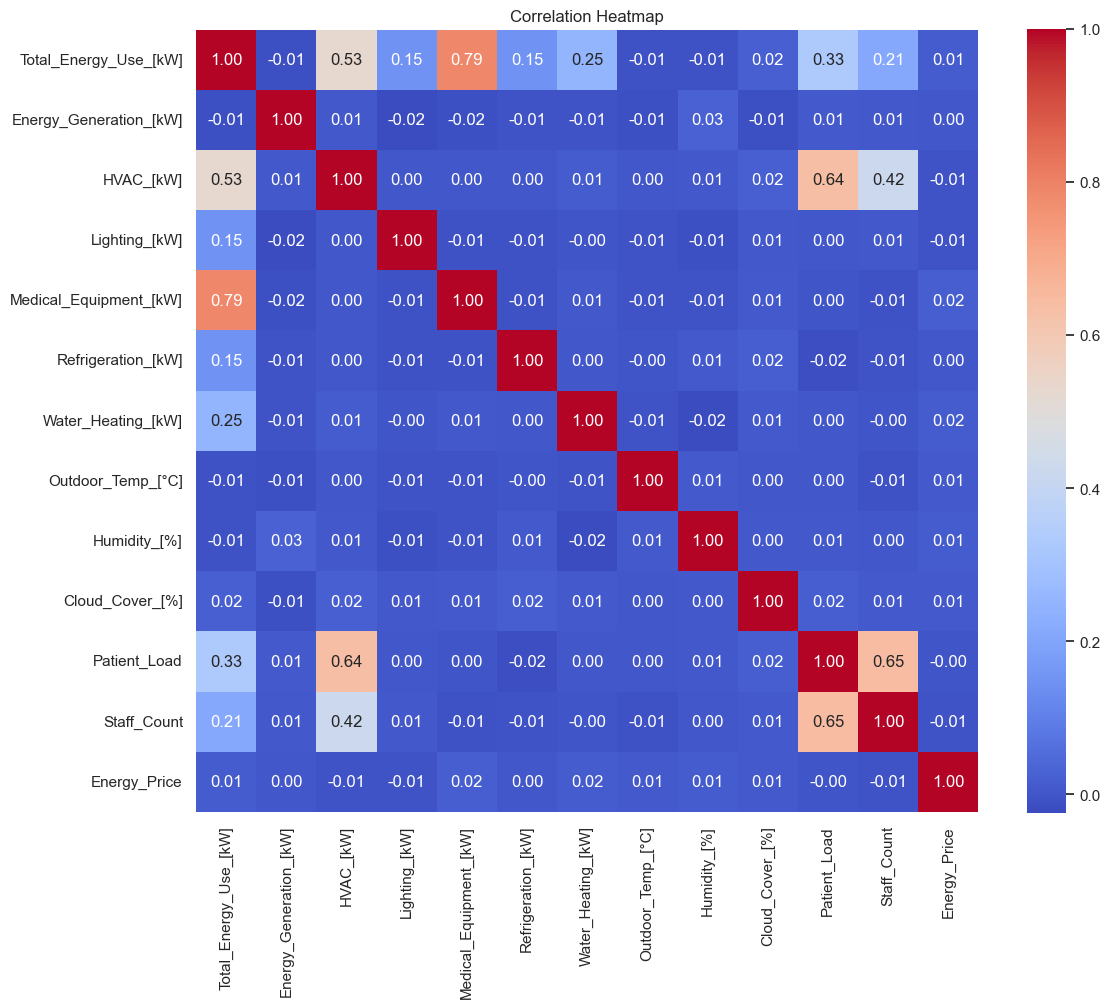

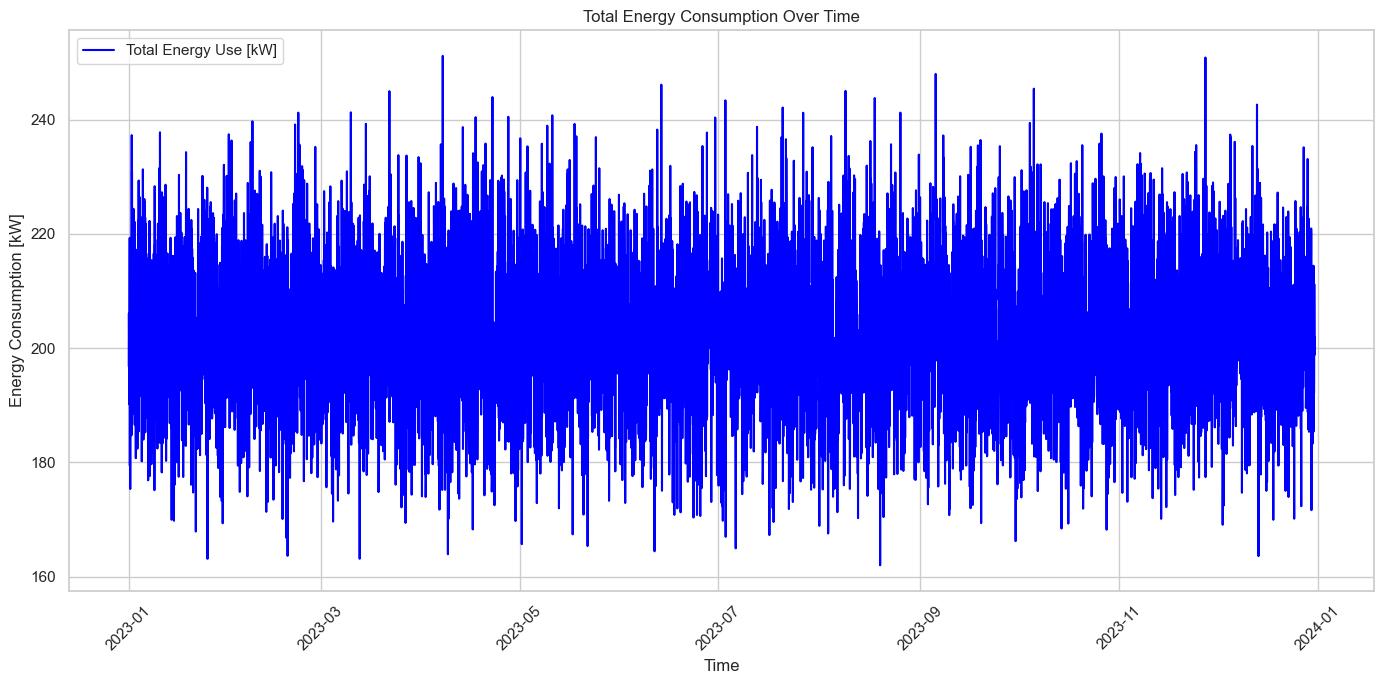

ValueError: Could not interpret value `Day_Type_Weekday` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('finalized_hospital_energy_consumption.csv')

# Data Preprocessing
# Rename columns for easier access
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Convert 'Time' to datetime
data['Time'] = pd.to_datetime(data['Time'])  # Removed the format parameter

# One-Hot Encoding for categorical columns
categorical_columns = ['Day_Type', 'Season']  # Specify categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check for missing values
print(data_encoded.isnull().sum())

# Descriptive Statistics
print(data_encoded.describe())

# Correlation Heatmap
plt.figure(figsize=(12, 10))

# Select only numeric columns for correlation
numeric_data = data_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Additional EDA: Plotting Energy Consumption Over Time
plt.figure(figsize=(14, 7))
plt.plot(data['Time'], data['Total_Energy_Use_[kW]'], label='Total Energy Use [kW]', color='blue')
plt.xlabel('Time')
plt.ylabel('Energy Consumption [kW]')
plt.title('Total Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplots to Analyze Energy Consumption by Day Type and Season
plt.figure(figsize=(14, 7))
sns.boxplot(x='Day_Type_Weekday', y='Total_Energy_Use_[kW]', data=data_encoded)
plt.title('Total Energy Consumption by Day Type (Weekday)')
plt.ylabel('Total Energy Use [kW]')
plt.xlabel('Day Type (1 = Weekday)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Season_Summer', y='Total_Energy_Use_[kW]', data=data_encoded)
plt.title('Total Energy Consumption by Season (Summer)')
plt.ylabel('Total Energy Use [kW]')
plt.xlabel('Season (1 = Summer)')
plt.tight_layout()
plt.show()

# Save the updated DataFrame to Excel
output_file = 'onehot_finalized_hospital_energy_consumption.csv'
data_encoded.to_excel(output_file, index=False)
print(f'Data saved to {output_file}')


In [9]:
data_encoded.head(20)

,Time,Total_Energy_Use_[kW],Energy_Generation_[kW],HVAC_[kW],Lighting_[kW],Medical_Equipment_[kW],Refrigeration_[kW],Water_Heating_[kW],Outdoor_Temp_[°C],Humidity_[%],Cloud_Cover_[%],Patient_Load,Staff_Count,Energy_Price,Summary,Day_Type_Weekend,Season_Spring,Season_Summer,Season_Winter
0,2023-01-01 00:00:00,206.034648,1.834045,88.108678,30.558083,60.105153,8.838244,18.424491,11.206090,59.279758,0.598658,88,45,0.160848,Peak,True,False,False,True
1,2023-01-01 01:00:00,196.797214,4.667629,93.851848,30.444158,42.320235,10.284929,19.896043,4.987564,41.649166,0.611853,91,47,0.271988,Peak,True,False,False,True
2,2023-01-01 02:00:00,201.418186,6.832635,95.863856,29.719563,49.668066,8.501847,17.664854,9.162416,30.530598,0.942202,63,37,0.221999,Peak,True,False,False,True
3,2023-01-01 03:00:00,190.167818,8.422848,87.177823,27.244121,46.468833,9.077069,20.199972,9.476320,45.642424,0.182236,53,21,0.189951,Peak,True,False,False,True
4,2023-01-01 04:00:00,199.749749,5.396921,85.441856,31.128928,50.255007,10.946386,21.977572,11.609459,59.090880,0.326541,63,42,0.217350,Peak,True,False,False,True
5,2023-01-01 05:00:00,193.142401,0.140798,91.495511,29.912926,47.246991,6.873866,17.613107,10.405495,41.039967,0.296274,94,20,0.139768,Peak,True,False,False,True
6,2023-01-01 06:00:00,211.291490,3.109823,92.388837,30.662527,59.755451,9.041652,19.443023,12.073830,54.238399,0.926301,90,47,0.165037,Peak,True,False,False,True
7,2023-01-01 07:00:00,219.288494,4.937956,95.381200,31.945927,57.955955,12.990869,21.014544,11.837713,65.488510,0.472215,86,34,0.204547,Peak,True,False,False,True
8,2023-01-01 08:00:00,179.435506,4.103829,88.495680,30.183522,30.124311,9.560656,21.071338,9.415385,34.315657,0.031429,88,36,0.251110,Peak,True,False,False,True
9,2023-01-01 09:00:00,200.164459,8.074402,82.991215,28.940480,55.132674,10.194155,22.905935,8.595674,67.187906,0.808120,55,47,0.279218,Peak,True,False,False,True


In [12]:
# Check the columns of the encoded DataFrame
print(data_encoded.columns)


Index(['Time', 'Total_Energy_Use_[kW]', 'Energy_Generation_[kW]', 'HVAC_[kW]',
       'Lighting_[kW]', 'Medical_Equipment_[kW]', 'Refrigeration_[kW]',
       'Water_Heating_[kW]', 'Outdoor_Temp_[°C]', 'Humidity_[%]',
       'Cloud_Cover_[%]', 'Patient_Load', 'Staff_Count', 'Energy_Price',
       'Summary', 'Day_Type_Weekend', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')


In [35]:
import pandas as pd

# # Load datasets
# datasets = {
#     "hospital": pd.read_csv("finalized_hospital_energy_consumption.csv"),
#     "home2": pd.read_csv("finalized_house_2_energy_consumption.csv"),
#     "home3": pd.read_csv("finalized_house_3_energy_consumption.csv"),
#     "home1": pd.read_csv("finalized_house1_energy_consumption.csv"),
#     "industry": pd.read_csv("finalized_industry_energy_consumption.csv"),
#     "office": pd.read_csv("modified_office.csv"),
#     "school": pd.read_csv("finalized_school_energy_consumption.csv"),

# }



import pandas as pd

# Load datasets with specified encoding
datasets = {
    "hospital": pd.read_csv("D:\FL IMP\datasets\client1_hospital.csv", encoding='ISO-8859-1'),
    "home2": pd.read_csv("D:\FL IMP\datasets\client2_house2.csv", encoding='ISO-8859-1'),
    "home3": pd.read_csv("D:\FL IMP\datasets\client3_house3.csv", encoding='ISO-8859-1'),
    "home1": pd.read_csv("D:\FL IMP\datasets\client4_house1.csv", encoding='ISO-8859-1'),
    "industry": pd.read_csv("D:\FL IMP\datasets\client5_industry.csv", encoding='ISO-8859-1'),
    "office": pd.read_csv("D:\FL IMP\datasets\client7_office.csv", encoding='ISO-8859-1'),
    "school": pd.read_csv("D:\FL IMP\datasets\client6_school.csv", encoding='ISO-8859-1'),
}

# Now you can proceed with processing the datasets

# Initialize sets to collect features
common_features = None
unique_features = {}

# Process each dataset
for key, df in datasets.items():
    print(f"Dataset: {key}")
    print("Columns:", list(df.columns))
    print()
    
    # Update common features
    if common_features is None:
        common_features = set(df.columns)
    else:
        common_features &= set(df.columns)
    
    # Update unique features
    unique_features[key] = set(df.columns)

# Convert sets to lists
common_features = list(common_features)
for key in unique_features:
    unique_features[key] = list(unique_features[key] - set(common_features))

# Print results
print("\n\n\n\n\n\n\nCommon Features Across All Datasets:")
print(common_features)
print()

print("Unique Features for Each Dataset:")
for key, features in unique_features.items():
    print(f"{key}: {features}")


Dataset: hospital
Columns: ['Time', 'Use [kW]', 'HVAC [kW]', 'Lighting [kW]', 'Medical Equipment [kW]', 'Refrigeration [kW]', 'Water Heating [kW]', 'Outdoor Temp [°C]', 'Humidity [%]', 'Day Type', 'Season', 'Cloud Cover [%]', 'Patient Load', 'Staff Count']

Dataset: home2
Columns: ['Time', 'Use [kW]', 'Dishwasher [kW]', 'Furnace [kW]', 'HVAC [kW]', 'Fridge [kW]', 'Outdoor Temp [°C]', 'Humidity [%]', 'Wind Speed [km/h]', 'Day Type', 'Season', 'Cloud Cover [%]']

Dataset: home3
Columns: ['Time', 'Use [kW]', 'Dishwasher [kW]', 'Furnace [kW]', 'HVAC [kW]', 'Fridge [kW]', 'Outdoor Temp [°C]', 'Humidity [%]', 'Wind Speed [km/h]', 'Day Type', 'Season', 'Cloud Cover [%]']

Dataset: home1
Columns: ['Time', 'Use [kW]', 'Dishwasher [kW]', 'Furnace [kW]', 'HVAC [kW]', 'Fridge [kW]', 'Outdoor Temp [°C]', 'Humidity [%]', 'Wind Speed [km/h]', 'Day Type', 'Season', 'Cloud Cover [%]']

Dataset: industry
Columns: ['Time', 'Use [kW]', 'HVAC [kW]', 'Machinery [kW]', 'Lighting [kW]', 'Computers and Electro

In [18]:
import pandas as pd

# List of CSV files to process
file_names = [
    "finalized_hospital_energy_consumption.csv",
    "finalized_house_2_energy_consumption.csv",
    "finalized_house_3_energy_consumption.csv",
    "finalized_house1_energy_consumption.csv",
    "finalized_industry_energy_consumption.csv",
    "modified_office.csv",
    "finalized_school_energy_consumption.csv"
]

# Function to standardize the 'Time' column
def standardize_time_format(df):
    # Attempt to convert using common formats
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
    df['Time'] = df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

# Process each file
for file_name in file_names:
    try:
        # Read the CSV file with a specified encoding
        df = pd.read_csv(file_name, encoding='ISO-8859-1')  # or use 'Windows-1252'

        # Check if the 'Time' column exists
        if 'Time' in df.columns:
            # Standardize the 'Time' column
            df = standardize_time_format(df)

            # Save the modified DataFrame back to a CSV file
            df.to_csv(file_name, index=False)
            print(f"Processed {file_name}: Time column standardized.")
        else:
            print(f"'Time' column not found in {file_name}. Skipping.")

    except UnicodeDecodeError as e:
        print(f"Error reading {file_name}: {e}")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

print("All datasets have been processed.")


Processed finalized_hospital_energy_consumption.csv: Time column standardized.
Processed finalized_house_2_energy_consumption.csv: Time column standardized.
Processed finalized_house_3_energy_consumption.csv: Time column standardized.
Processed finalized_house1_energy_consumption.csv: Time column standardized.
Processed finalized_industry_energy_consumption.csv: Time column standardized.
Processed modified_office.csv: Time column standardized.
Processed finalized_school_energy_consumption.csv: Time column standardized.
All datasets have been processed.


In [32]:
import pandas as pd

# Load your dataset (example for hospital)
hospital_df = pd.read_csv("finalized_hospital_energy_consumption.csv", parse_dates=['Time'], dayfirst=True, encoding='ISO-8859-1')

# Set the 'Time' column as the index
hospital_df.set_index('Time', inplace=True)


In [34]:
import pandas as pd
import os

# List of dataset file names
dataset_files = {
    "hospital": "finalized_hospital_energy_consumption.csv",
    # "home1": "home1_data.csv",
    # "home2": "home2_data.csv",
    # "home3": "home3_data.csv",
    # "industry": "industry_data.csv",
    # "office": "office_data.csv",
    # "school": "school_data.csv",
}

# Directory for saving preprocessed datasets
output_dir = "preprocessed_datasets"
os.makedirs(output_dir, exist_ok=True)

# Function to process each dataset
def preprocess_and_save_dataset(file_name, dataset_name):
    try:
        # Load the dataset with specified encoding
        df = pd.read_csv(file_name, encoding='ISO-8859-1')  # Try 'utf-8', 'ISO-8859-1', or 'windows-1252'
        
        # Identify categorical columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        
        # Perform one-hot encoding
        df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
        
        # Save the preprocessed dataset with a new name
        output_file = os.path.join(output_dir, f"preprocessed_{dataset_name}_data.csv")
        df_encoded.to_csv(output_file, index=False)
        print(f"Preprocessed dataset saved to {output_file}")
    except UnicodeDecodeError as e:
        print(f"Encoding error for file {file_name}: {e}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Process each dataset
for dataset_name, file_name in dataset_files.items():
    preprocess_and_save_dataset(file_name, dataset_name)

print("All datasets preprocessed and saved.")


Preprocessed dataset saved to preprocessed_datasets\preprocessed_hospital_data.csv
All datasets preprocessed and saved.


In [43]:
import pandas as pd
import numpy as np

# Common features
common_features = ['Time', 'Use [kW]', 'HVAC [kW]', 'Cloud Cover [%]', 'Day Type',
                   'Outdoor Temp [°C]', 'Season', 'Humidity [%]']

# Function to preprocess each dataset
def preprocess_data(df, dataset_name):
    # Add missing common features with default values
    for feature in common_features:
        if feature not in df.columns:
            df[feature] = 0  # Use 0 or np.nan for missing features

    # Define unique features for additional processing
    if dataset_name == 'hospital':
        unique_features = ['Staff Count', 'Water Heating [kW]', 'Patient Load', 
                           'Refrigeration [kW]', 'Medical Equipment [kW]', 'Lighting [kW]']
    elif dataset_name in ['home1', 'home2', 'home3']:
        unique_features = ['Dishwasher [kW]', 'Fridge [kW]', 'Wind Speed [km/h]', 'Furnace [kW]']
    elif dataset_name == 'industry':
        unique_features = ['Staff Count', 'Compressor [kW]', 'Production Hours', 
                           'Refrigeration [kW]', 'Computers and Electronics [kW]', 
                           'Lighting [kW]', 'Machinery [kW]']
    elif dataset_name == 'office':
        unique_features = ['Computers [kW]', 'Employees Present', 'Lighting [kW]']
    elif dataset_name == 'school':
        unique_features = ['Computers [kW]', 'Refrigeration [kW]', 'Lighting [kW]', 'Kitchen Equipment [kW]']
    else:
        unique_features = []

    # Add missing unique features
    for feature in unique_features:
        if feature not in df.columns:
            df[feature] = 0  # Use 0 or np.nan for missing unique features

    # Reorder columns to match the common features and add unique features
    df = df[common_features + unique_features]  # Ensure order: common first, then unique

    # Convert 'Time' to datetime if necessary and drop if needed
    # df['Time'] = pd.to_datetime(df['Time'])
    # df.drop('Time', axis=1, inplace=True)  # Example to drop Time

    # Reshape data if needed
    # Here you can add reshaping logic according to your model's expected input shape
    # For example:
    # X = df.values.reshape(-1, 24, len(common_features + unique_features))  # Example reshape
    return df  # Or return reshaped data

# Example usage:
hospital_df = pd.read_csv('finalized_hospital_energy_consumption.csv', encoding='iso-8859-1')
preprocessed_hospital_data = preprocess_data(hospital_df, 'hospital')
preprocessed_hospital_data.to_csv('finalized_hospital_energy_consumption.csv', index=False)


# home2_df = pd.read_csv('home2_data.csv')
# preprocessed_home2_data = preprocess_data(home2_df, 'home2')

# Repeat for other datasets as needed
